In [3]:
## Code Header #######
## Notebook Name: Kickstarter Analysis
## Objective: To learn which design decisions help kickstarter campaigns succeed and to predict the successes of any kickstarter campaigns.
## Start Date: 11th April 2020
## Data Sources
    # Source 1: Webscraped kickstarter data - Scraped by Web Robots - https://webrobots.io/kickstarter-datasets/
## Edits to be made
## Questions about the context
    # Does every backer pledge a fixed amount? Or can backers decide the pledge amount?
## Structure of the analysis
    # Data Input: Read all the columns in the right format
    # Run analysis for a single file first, but replicate for all files together.( Is there a way to batch execute)
    # Feature Engineering
        # Blurb : Brief text explaining the project
        # Calculate campaign length
        # Average pledge by backer
        # Extract the categories from the dictionary.
    # EDA
        # Glean insights which might help design decisions
    # SciKit Learn
        # Logistic Regression; Glean insights which might help design decisions
        # Trees
        # Neural Network
    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import json
import ast
from datetime import datetime
from sklearn.model_selection import train_test_split
import textstat
import math
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics as sk_metrics
import glob
os.getcwd()

'C:\\Users\\sthal\\Python Scripts'

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '16_Hidden_Non_Text.h5',
 '17_Hidden_Non_Text.h5',
 '17_Hidden_Text.h5',
 'Data',
 'DT & RF results.docx',
 'Kickstarter Analysis.ipynb',
 'Kickstarter Analysis_v2.ipynb',
 'Kickstarter Text Features - Utkarsh.ipynb',
 'Model performances report v1.docx',
 'Neural Network Models.docx',
 'Project Kickstarter - Shortcut.lnk',
 'Text mining & Modeling (Logistic) with and without text features  - Utkarsh.ipynb']

In [3]:
path = r'C:\Users\valla\Python Run Environment\Data Mining Project Kickstarter\Data' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
input = pd.concat(li, axis=0, ignore_index=True)

In [4]:
len(input)

211271

In [5]:
input.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,211271.000000,2.112700e+05,2.112710e+05,2.112710e+05,211271.000000,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,2.112710e+05,211271.000000,2.112700e+05
mean,150.037208,1.367009e+04,1.470048e+09,1.477090e+09,0.988962,5.135802e+04,1.074248e+09,1.474242e+09,2.234156e+04,1.476923e+09,1.004172,1.366035e+04
std,908.844718,1.043794e+05,7.053706e+07,7.027463e+07,0.217407,1.260406e+06,6.190552e+08,7.035694e+07,6.063421e+05,7.016636e+07,0.237434,1.042839e+05
min,0.000000,0.000000e+00,1.240366e+09,1.243770e+09,0.006985,1.000000e-02,2.941000e+03,0.000000e+00,0.000000e+00,1.243770e+09,0.000000,0.000000e+00
25%,4.000000,1.200000e+02,1.420513e+09,1.427039e+09,1.000000,1.500000e+03,5.383756e+08,1.424207e+09,1.240000e+02,1.426881e+09,1.000000,1.200000e+02
50%,28.000000,1.615000e+03,1.470848e+09,1.478232e+09,1.000000,5.000000e+03,1.074606e+09,1.475512e+09,1.652000e+03,1.478164e+09,1.000000,1.615000e+03
75%,92.000000,6.782000e+03,1.533627e+09,1.541172e+09,1.000000,1.500000e+04,1.610673e+09,1.538411e+09,7.245000e+03,1.541110e+09,1.000000,6.795951e+03
max,105857.000000,1.214344e+07,1.579142e+09,1.584328e+09,1.888592,1.000000e+08,2.147467e+09,1.579151e+09,1.469102e+08,1.579153e+09,1.716408,1.214344e+07


In [6]:
input.shape
list(input.columns)

['backers_count',
 'blurb',
 'category',
 'converted_pledged_amount',
 'country',
 'country_displayable_name',
 'created_at',
 'creator',
 'currency',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'disable_communication',
 'friends',
 'fx_rate',
 'goal',
 'id',
 'is_backing',
 'is_starrable',
 'is_starred',
 'launched_at',
 'location',
 'name',
 'permissions',
 'photo',
 'pledged',
 'profile',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'static_usd_rate',
 'urls',
 'usd_pledged',
 'usd_type']

In [7]:
# Converting all date columns to a proper date time format
input.created_at = pd.to_datetime(input.created_at, unit = 's')
input.deadline = pd.to_datetime(input.deadline, unit = 's')
input.launched_at = pd.to_datetime(input.launched_at, unit = 's')
input.state_changed_at = pd.to_datetime(input.state_changed_at, unit = 's')

In [8]:
input[['created_at','deadline', 'launched_at', 'state_changed_at', 'state']].head()

,created_at,deadline,launched_at,state_changed_at,state
0,2018-08-19 20:36:22,2019-02-03 23:26:21,2018-12-05 23:26:21,2019-02-03 23:26:22,failed
1,2016-11-30 04:30:00,2017-01-25 13:45:21,2016-12-26 13:45:21,2017-01-25 13:45:21,failed
2,2016-11-01 20:53:37,2016-11-16 13:20:24,2016-11-02 12:20:24,2016-11-16 13:20:24,failed
3,2018-01-23 02:37:14,2018-05-10 18:33:16,2018-04-10 18:33:16,2018-05-10 18:33:17,failed
4,2019-04-08 03:43:56,2019-05-17 01:23:35,2019-04-17 01:23:35,2019-05-17 01:23:35,failed


In [9]:
# Converting each value in the 'category' column to a dictionary
input['cat_dict'] = input.category.apply(ast.literal_eval)


In [10]:
# Creating new columns to store the category information
len(input)
input['category'] = ''
input['sub_category'] = ''

In [11]:
# Defining a function to read the dictionary and extract the required values
def categorize(dictionary):
    if 'parent_name' in dictionary:
        return (dictionary['parent_name'], dictionary['name'])
    else:
        return (dictionary['name'], None)


# Applying this function to the category dictionary field in the input dataset
category_tuples = input.cat_dict.apply(categorize)

# The result was a series of tuples, we must now split up these tuples and assign them appropriately to the required columns
input.category = pd.DataFrame(category_tuples.tolist())[0]
input.sub_category = pd.DataFrame(category_tuples.tolist())[1]

In [12]:
# Removing duplicates at profile level with keeping the last source_url value
input = input.drop_duplicates(subset = 'profile', keep = 'last')
input.reset_index();

In [13]:
len(input)

186004

In [14]:
#EDA 
    # Check Distribution of data 
        # Categories/ sub categories
        # Countries
        # dates launched at?


### Histograms

In [15]:
input['Success'] = input.state.apply(lambda x: 1 if x =='successful' else 0)
input['Failure'] = input.state.apply(lambda x: 0 if x =='successful' else 1)

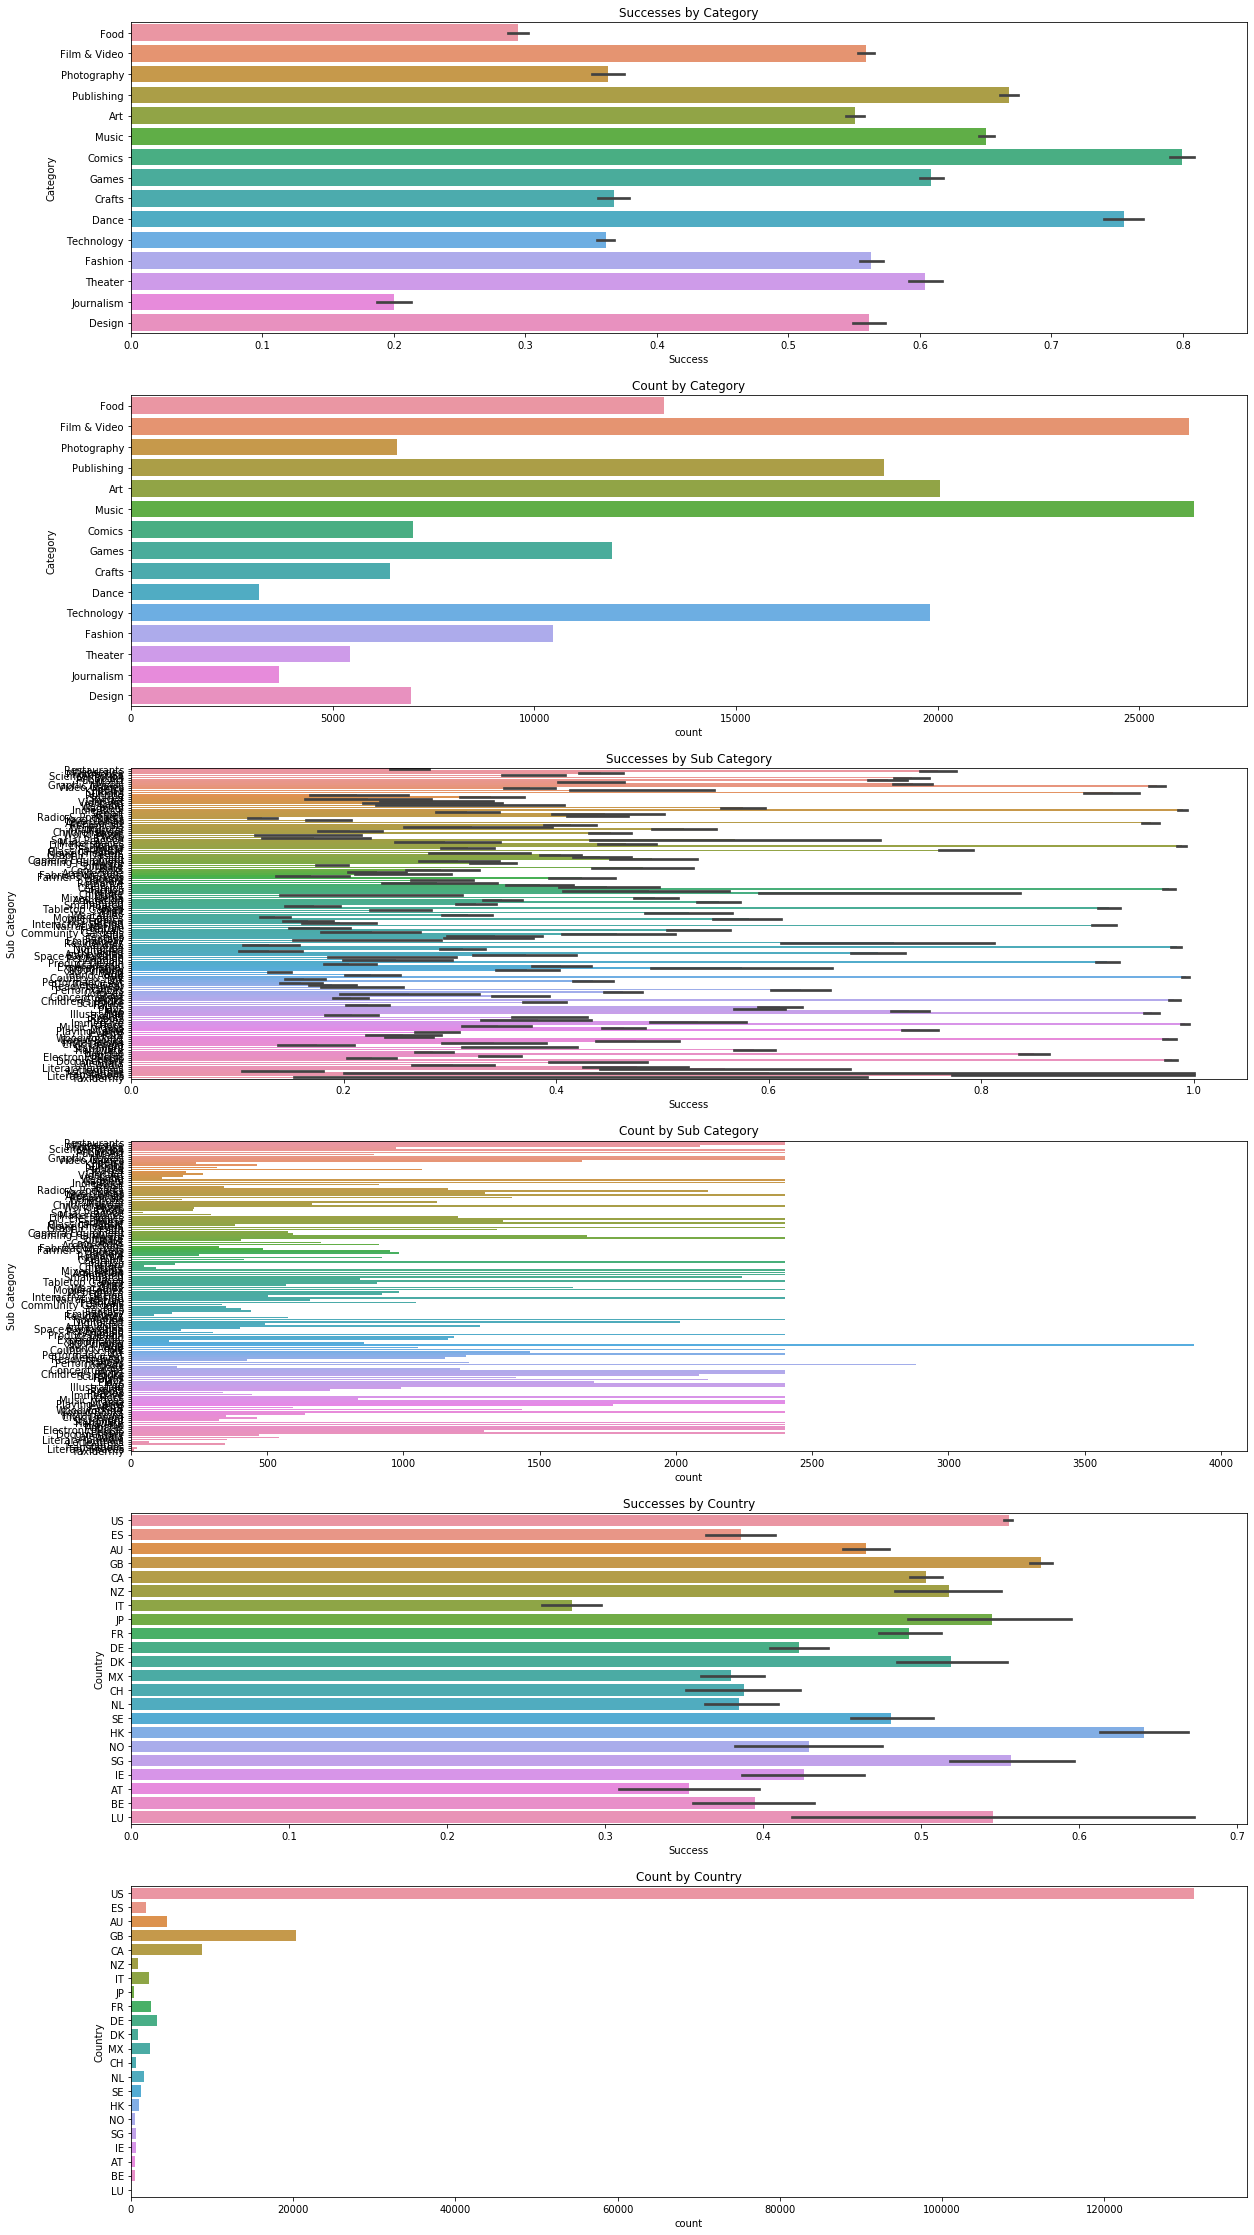

In [16]:
fig, ax = plt.subplots(6, figsize = (20, 40))
chart1 = sns.barplot(x = 'Success', y = 'category', data = input, ax = ax[0])
chart1.set_title('Successes by Category')
chart1.set_ylabel('Category')

chart2 = sns.countplot(y = 'category',  data = input, ax = ax[1])
chart2.set_title('Count by Category');
chart2.set_ylabel('Category')

chart3 = sns.barplot(x = 'Success', y = 'sub_category', data = input, ax = ax[2])
chart3.set_title('Successes by Sub Category')
chart3.set_ylabel('Sub Category')

chart4 = sns.countplot(y = 'sub_category', data = input, ax = ax[3])
chart4.set_title('Count by Sub Category');
chart4.set_ylabel('Sub Category')


chart5 = sns.barplot(x = 'Success', y = 'country', data = input, ax = ax[4])
chart5.set_title('Successes by Country')
chart5.set_ylabel('Country');

chart6 = sns.countplot(y = 'country', data = input, ax = ax[5]);
chart6.set_title('Count by Country')
chart6.set_ylabel('Country');


In [17]:
## Grouping and aggregating success and failure numbers 
cat_agg = input.groupby(['category'],as_index = False).agg({'Success':[sum], 'Failure':[sum]})
cat_agg.columns = cat_agg.columns.get_level_values(0)
cat_agg.head()



,category,Success,Failure
0,Art,11049,9024
1,Comics,5584,1404
2,Crafts,2357,4058
3,Dance,2393,775
4,Design,3899,3046


In [18]:
len(input.loc[input.category == 'Art'])
# The sum checks out

20073

In [19]:
country_agg = input.groupby(['country'], as_index = False).agg({'Success':[sum], 'Failure':[sum]})
country_agg.columns = country_agg.columns.get_level_values(0)
country_agg.head()

,country,Success,Failure
0,AT,160,293
1,AU,2061,2370
2,BE,211,323
3,CA,4385,4326
4,CH,243,383


In [20]:
# Checking the count of None subcategories
sum(input.sub_category.apply(lambda x: x is None))


7839

In [21]:
len(input)

186004

In [22]:
# Checking the count of LU
sum(input.country == 'LU')

55

### Feature Engineering

In [23]:
# Create a country code lookup dictionary
country_code = input.country.tolist()
country_name = input.country_displayable_name.tolist()

country_dict = dict(zip(country_code, country_name))

country_dict['LU']

'Luxembourg'

In [24]:
## Date Differences
    # Time between launch and deadline
    # Time between creation and launch

input['design_duration_days'] = (input.launched_at - input.created_at).apply(lambda x: x.days)
input['campaign_duration_days'] = (input.deadline - input.launched_at).apply(lambda x: x.days)

## Extract month values and day values of launch and deadline
input['launch_day'] = input.launched_at.apply(lambda x: x.day)
input['launch_month'] = input.launched_at.apply(lambda x: x.month)
input['launch_DOW'] = input.launched_at.apply(lambda x: x.weekday())


In [25]:
# Converting goals of all currencies to USD
input['goal_usd'] = input.goal * input.static_usd_rate

In [26]:
## Feature engineering with blurb and name?

# Blurb readability test using Flesch Reading Score ( higher = more readable)
# There are NaNs in the blurb column, so we'll convert them to str first and remove them
input.blurb = input.blurb.apply(str)
input = input.loc[input.blurb != 'nan']
input['blurb_readability_score'] = input.blurb.apply(textstat.flesch_reading_ease)



In [27]:
input[['blurb_readability_score', 'blurb']]

,blurb_readability_score,blurb
0,74.53,Das Good Inc goal is to make cooking easy and ...
1,42.72,A web series about the soul crushing exercise ...
2,2.44,"A photographic essay on the historic, incompar..."
3,33.24,A romantic comedy mini series following a self...
4,34.26,The Drums of Atlant is an original science fic...
5,59.80,"""...a real photographer will make you look twi..."
7,62.34,"Es nuestra ilusión, tener nuestro propio resta..."
8,50.16,"A relaxing teaching tool, this coloring book f..."
9,72.50,Floating above the planet Ithor on Tafanda Bay...
10,41.70,"Social, environmental and cultural project tha..."


Text(0.5, 0, 'Campaign Duration in days')

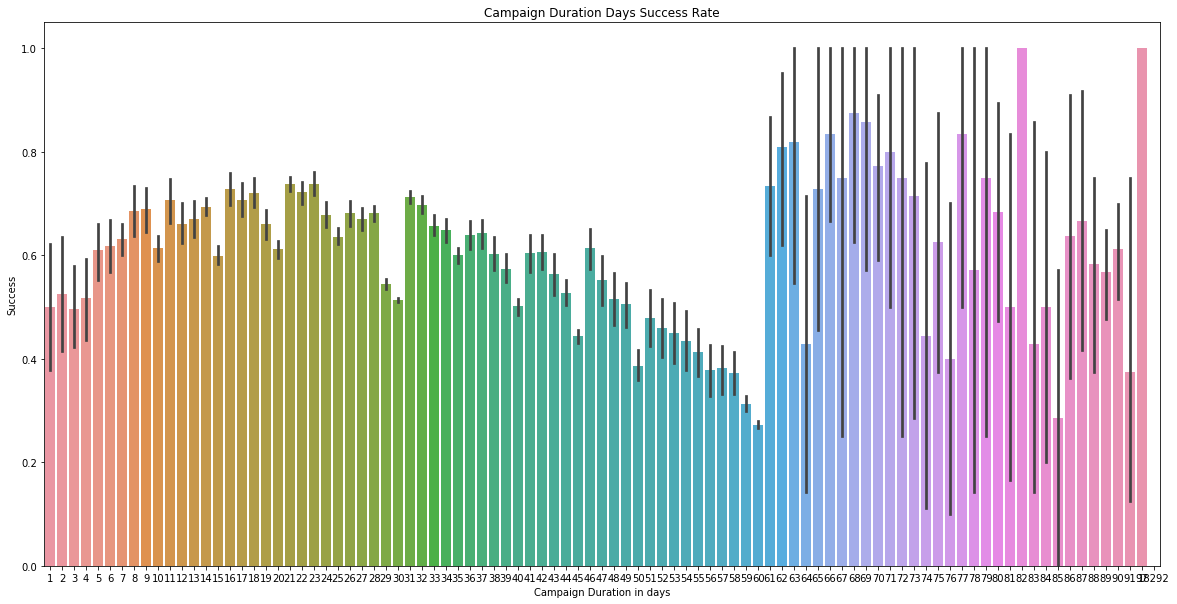

In [29]:
# Check success rate by duration

plt.subplots(figsize = (20,10))
chart2 = sns.barplot(x = 'campaign_duration_days' , y = 'Success', data = input)
chart2.set_title('Campaign Duration Days Success Rate');
chart2.set_xlabel('Campaign Duration in days')


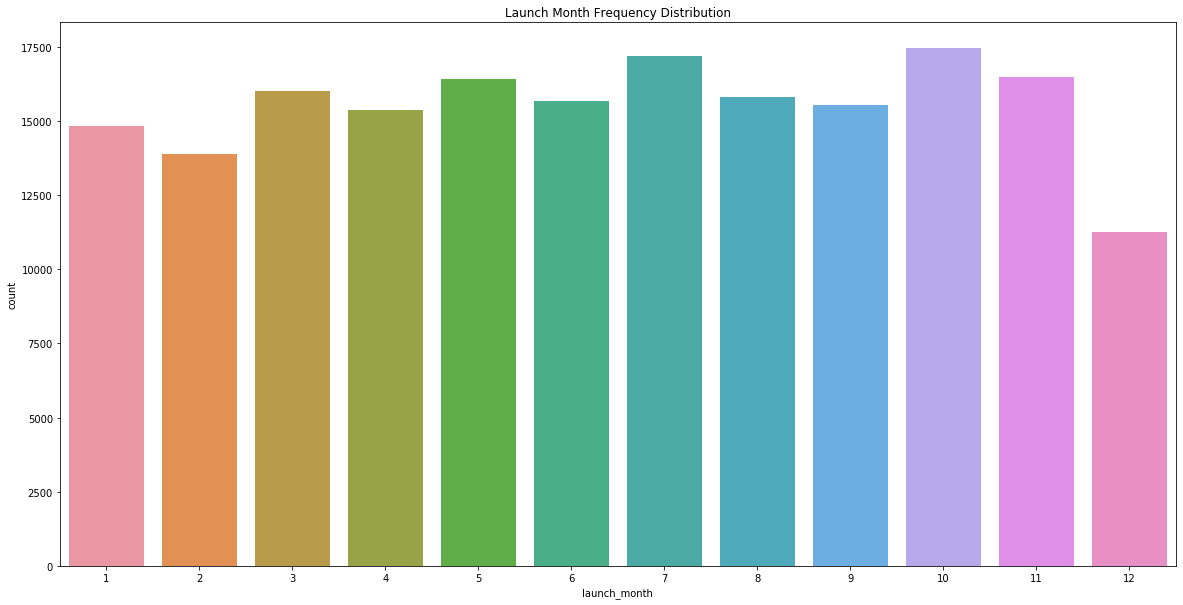

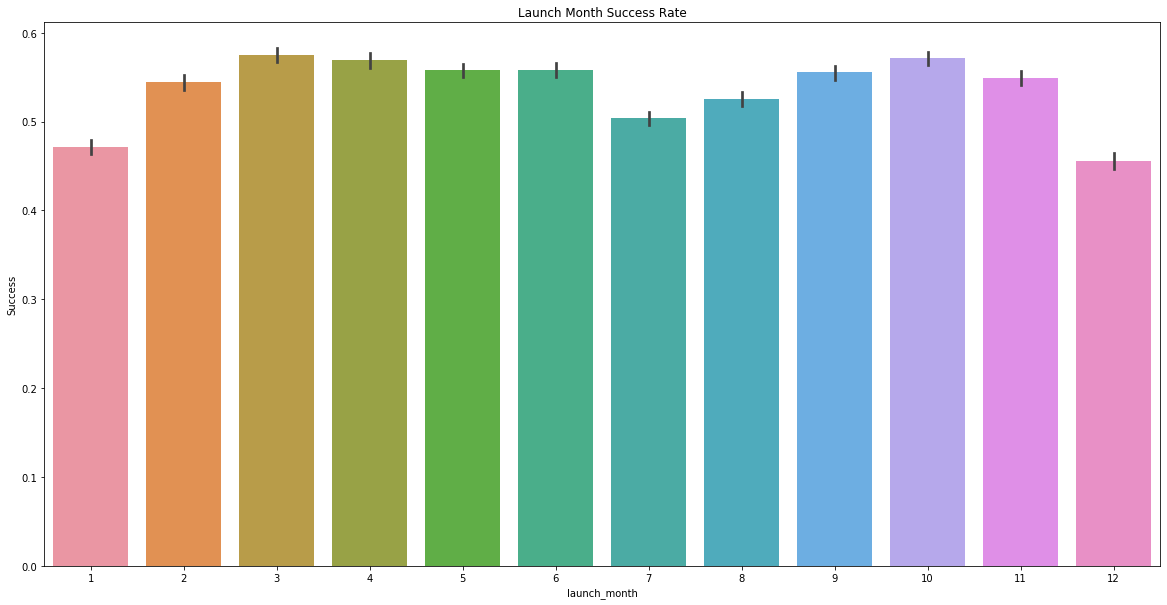

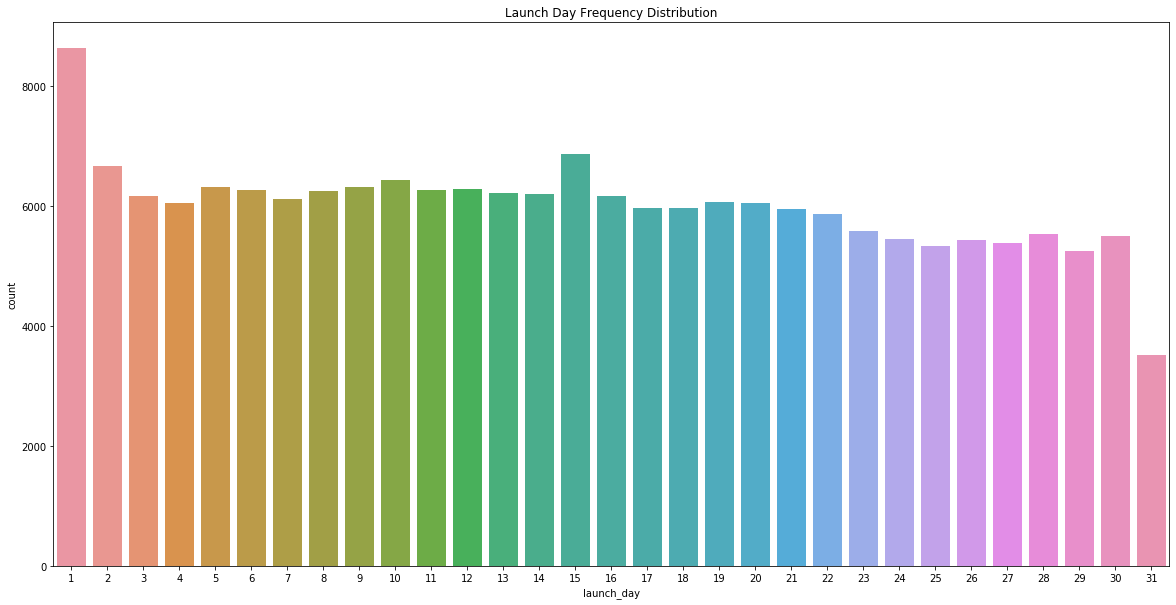

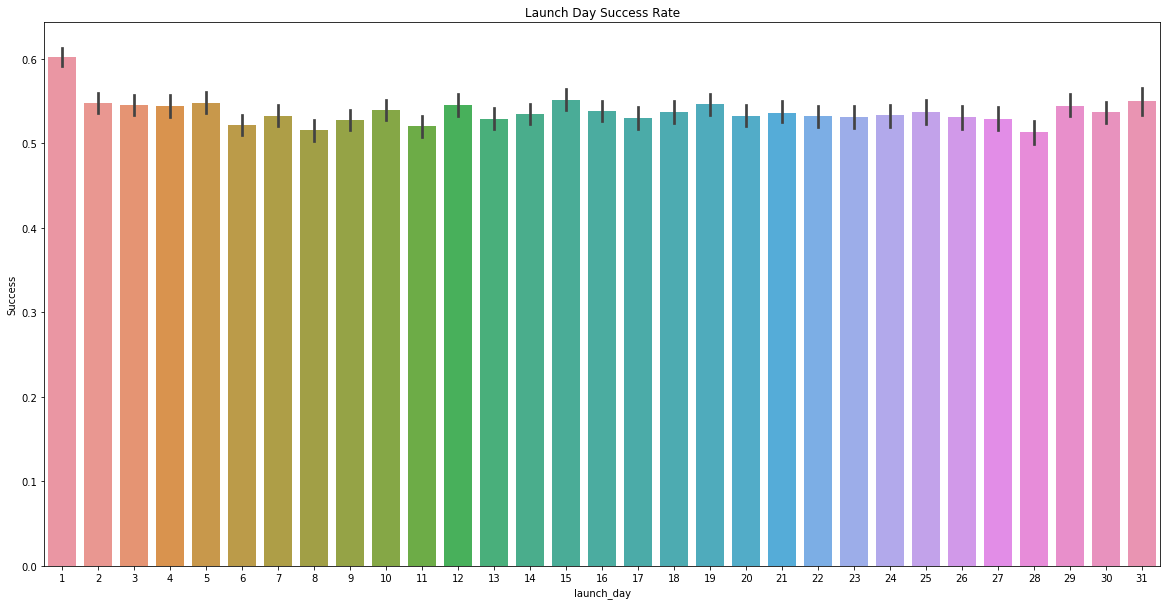

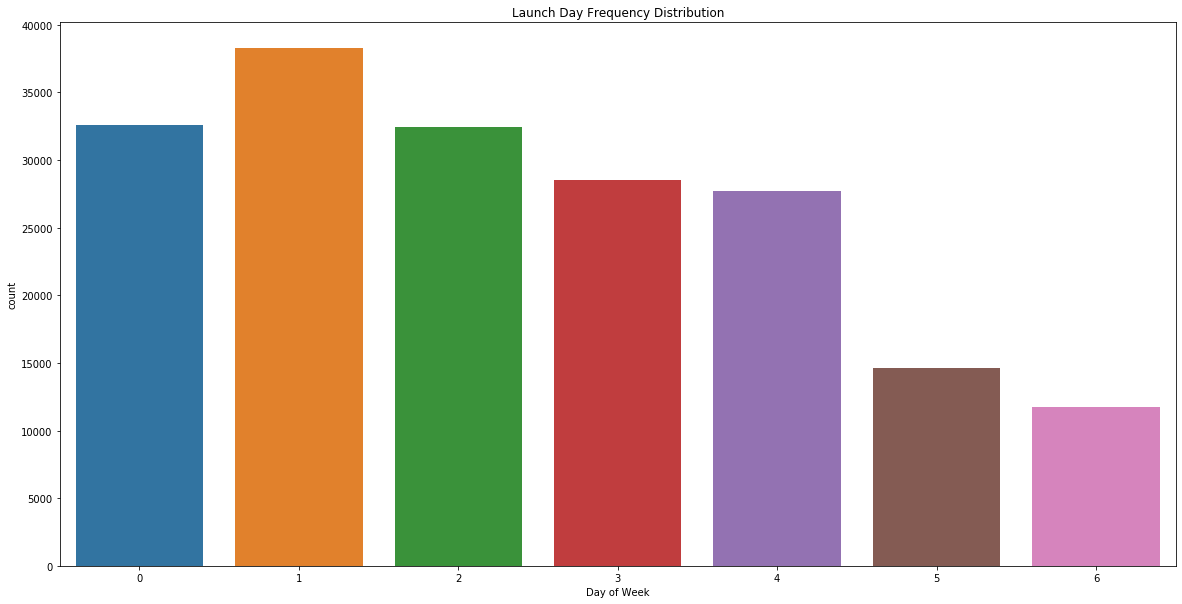

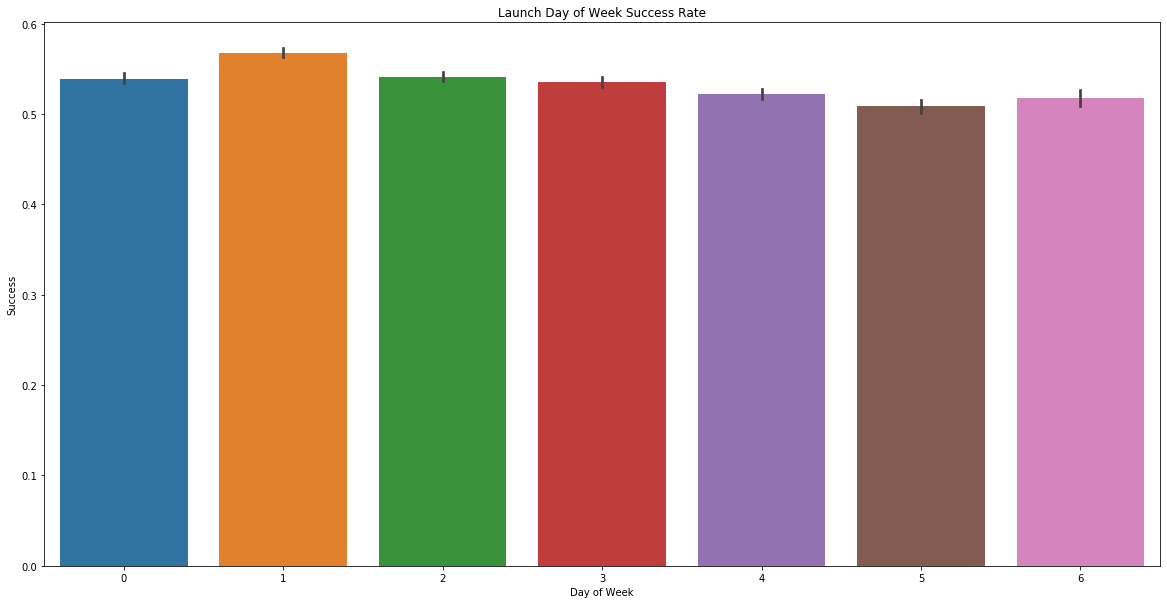

In [30]:

plt.subplots(figsize = (20,10))
chart3 = sns.countplot(x = 'launch_month', data = input)
chart3.set_title('Launch Month Frequency Distribution')

plt.subplots(figsize = (20,10))
chart4 = sns.barplot(x = 'launch_month', y = 'Success', data = input)
chart4.set_title('Launch Month Success Rate')

plt.subplots(figsize = (20,10))
chart5 = sns.countplot(x = 'launch_day', data = input)
chart5.set_title('Launch Day Frequency Distribution')

plt.subplots(figsize = (20,10))
chart6 = sns.barplot(x = 'launch_day', y = 'Success', data = input)
chart6.set_title('Launch Day Success Rate')

plt.subplots(figsize = (20,10))
chart7 = sns.countplot(x = 'launch_DOW', data = input)
chart7.set_title('Launch Day Frequency Distribution')
chart7.set_xlabel('Day of Week');

plt.subplots(figsize = (20,10))
chart8 = sns.barplot(x = 'launch_DOW', y = 'Success', data = input)
chart8.set_title('Launch Day of Week Success Rate')
chart8.set_xlabel('Day of Week');


#### 0 is Monday, 6 is Sunday

In [31]:
list(input.columns)

['backers_count',
 'blurb',
 'category',
 'converted_pledged_amount',
 'country',
 'country_displayable_name',
 'created_at',
 'creator',
 'currency',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'disable_communication',
 'friends',
 'fx_rate',
 'goal',
 'id',
 'is_backing',
 'is_starrable',
 'is_starred',
 'launched_at',
 'location',
 'name',
 'permissions',
 'photo',
 'pledged',
 'profile',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'static_usd_rate',
 'urls',
 'usd_pledged',
 'usd_type',
 'cat_dict',
 'sub_category',
 'Success',
 'Failure',
 'design_duration_days',
 'campaign_duration_days',
 'launch_day',
 'launch_month',
 'launch_DOW',
 'goal_usd',
 'blurb_readability_score']

In [32]:
# Creating datasets for modelling 
X = input[[ 'category', 'country', 'sub_category', 'design_duration_days', 'campaign_duration_days', 'launch_day', 'launch_month', 'launch_DOW', 'goal_usd', 'blurb_readability_score']]
X = X.drop(columns =['sub_category'])
y  = input[['Success']]
list(X.columns)

['category',
 'country',
 'design_duration_days',
 'campaign_duration_days',
 'launch_day',
 'launch_month',
 'launch_DOW',
 'goal_usd',
 'blurb_readability_score']

In [33]:
X = pd.get_dummies(X, columns = ['category','country'])

In [34]:
# There are ~45 columns for this data file at the time of writing this comment, might change with the dataset
list(X.columns)

['design_duration_days',
 'campaign_duration_days',
 'launch_day',
 'launch_month',
 'launch_DOW',
 'goal_usd',
 'blurb_readability_score',
 'category_Art',
 'category_Comics',
 'category_Crafts',
 'category_Dance',
 'category_Design',
 'category_Fashion',
 'category_Film & Video',
 'category_Food',
 'category_Games',
 'category_Journalism',
 'category_Music',
 'category_Photography',
 'category_Publishing',
 'category_Technology',
 'category_Theater',
 'country_AT',
 'country_AU',
 'country_BE',
 'country_CA',
 'country_CH',
 'country_DE',
 'country_DK',
 'country_ES',
 'country_FR',
 'country_GB',
 'country_HK',
 'country_IE',
 'country_IT',
 'country_JP',
 'country_LU',
 'country_MX',
 'country_NL',
 'country_NO',
 'country_NZ',
 'country_SE',
 'country_SG',
 'country_US']

In [35]:
# Storing Column names since we will convert the factors to a matrix 
X_cols = X.columns
#X = np.array(X)
#y = np.array(y)

In [36]:
# Test Train split with 30% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 710, stratify = y)

In [53]:
len(y_test)

37200

### Model 1- Simple Logistic : Model Training

In [38]:
# Training a simple logistic regression model
logistic_mod = LogisticRegression(penalty = 'l2', solver = 'lbfgs')
logistic_mod.fit(X_train, y_train['Success'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model 1- Simple Logistic : Model Evaluation

In [39]:
# In sampling accuracy score
logistic_mod.score(X_train, y_train['Success'])

0.6114075647194817

In [40]:
# Out sampling accuracy score
logistic_mod.score(X_test, y_test['Success'])

0.6105913978494624

In [41]:
# Coefficient values for all factors
pd.DataFrame(list(logistic_mod.coef_), columns = X_cols)

,design_duration_days,campaign_duration_days,launch_day,launch_month,launch_DOW,goal_usd,blurb_readability_score,category_Art,category_Comics,category_Crafts,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.000947,-0.012642,0.008004,0.039376,0.003112,-0.000015,0.004877,0.000191,0.004024,-0.002951,...,-0.001088,0.000012,0.000005,-0.000703,-0.000462,-0.000103,-0.000029,-0.000139,0.000069,0.009683


In [42]:
# Making predictions on the test set
y_pred = logistic_mod.predict(X_test)


In [43]:
import collections
test_counter = collections.Counter(y_test['Success'])
print( 'Test set split:', test_counter)
print('Proportion of positives in test set is:', test_counter[1]/(test_counter[1] + test_counter[0]), '\n')
counter = collections.Counter(y_pred)

print( 'Predictions split:', counter)
print('Proportion of positives in prediction is:', counter[1]/(counter[1] + counter[0]), '\n')
tn, fp, fn, tp = sk_metrics.confusion_matrix(y_test, y_pred).ravel()

print('True Negative:',tn,'|False Positive:',fp, '|False Negative:', fn,'|True Positive:', tp, '\n')
print('True Positive Rate:', tp/ (tp + fn))
print('True Negative Rate:', tn/ (tn + fp))

Test set split: Counter({1: 20038, 0: 17162})
Proportion of positives in test set is: 0.5386559139784947 

Predictions split: Counter({1: 26602, 0: 10598})
Proportion of positives in prediction is: 0.7151075268817204 

True Negative: 6637 |False Positive: 10525 |False Negative: 3961 |True Positive: 16077 

True Positive Rate: 0.8023255813953488
True Negative Rate: 0.38672648875422444
